# Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict

def analyze_trials(trials_list, title_prefix=""):
   # Calculate average metrics
   metrics = {
       'accuracy': np.mean([t['accuracy'] for t in trials_list]),
       'precision': np.mean([t['precision'] for t in trials_list]),
       'recall': np.mean([t['recall'] for t in trials_list]),
       'f1': np.mean([t['f1'] for t in trials_list])
   }
   
   metrics_std = {
       'accuracy_std': np.std([t['accuracy'] for t in trials_list]),
       'precision_std': np.std([t['precision'] for t in trials_list]),
       'recall_std': np.std([t['recall'] for t in trials_list]),
       'f1_std': np.std([t['f1'] for t in trials_list])
   }
   
   # Calculate average confusion matrix
   confusion_matrices = [t['confusion_matrix'] for t in trials_list]
   avg_conf_matrix = np.mean(confusion_matrices, axis=0)
   
   # Extract training history
   histories = [t['history'] for t in trials_list]
   
   # Calculate mean and std for each metric across trials
   avg_history = {
       'accuracy': np.mean([h['accuracy'] for h in histories], axis=0),
       'loss': np.mean([h['loss'] for h in histories], axis=0),
       'val_accuracy': np.mean([h['val_accuracy'] for h in histories], axis=0),
       'val_loss': np.mean([h['val_loss'] for h in histories], axis=0)
   }
   
   std_history = {
       'accuracy': np.std([h['accuracy'] for h in histories], axis=0),
       'loss': np.std([h['loss'] for h in histories], axis=0),
       'val_accuracy': np.std([h['val_accuracy'] for h in histories], axis=0),
       'val_loss': np.std([h['val_loss'] for h in histories], axis=0)
   }
   
   # Create visualizations
   plt.figure(figsize=(15, 10))
   
   # Plot 1: Training and Validation Accuracy
   plt.subplot(2, 2, 1)
   epochs = range(1, len(avg_history['accuracy']) + 1)
   plt.plot(epochs, avg_history['accuracy'], 'b-', label='Training Accuracy')
   plt.fill_between(epochs, 
                   avg_history['accuracy'] - std_history['accuracy'],
                   avg_history['accuracy'] + std_history['accuracy'],
                   alpha=0.2)
   plt.plot(epochs, avg_history['val_accuracy'], 'r-', label='Validation Accuracy')
   plt.fill_between(epochs, 
                   avg_history['val_accuracy'] - std_history['val_accuracy'],
                   avg_history['val_accuracy'] + std_history['val_accuracy'],
                   alpha=0.2, color='r')
   plt.title(f'{title_prefix}Average Training and Validation Accuracy')
   plt.legend()
   
   # Plot 2: Training and Validation Loss
   plt.subplot(2, 2, 2)
   plt.plot(epochs, avg_history['loss'], 'b-', label='Training Loss')
   plt.fill_between(epochs, 
                   avg_history['loss'] - std_history['loss'],
                   avg_history['loss'] + std_history['loss'],
                   alpha=0.2)
   plt.plot(epochs, avg_history['val_loss'], 'r-', label='Validation Loss')
   plt.fill_between(epochs, 
                   avg_history['val_loss'] - std_history['val_loss'],
                   avg_history['val_loss'] + std_history['val_loss'],
                   alpha=0.2, color='r')
   plt.title(f'{title_prefix}Average Training and Validation Loss')
   plt.legend()
   
   # Plot 3: Average Confusion Matrix
   plt.subplot(2, 2, 3)
   sns.heatmap(avg_conf_matrix, annot=True, fmt='.1f', cmap='Blues')
   plt.title(f'{title_prefix}Average Confusion Matrix')
   plt.xlabel('Predicted')
   plt.ylabel('Actual')
   
   # Plot 4: Final Metrics Distribution
   plt.subplot(2, 2, 4)
   metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1']
   metrics_values = [metrics['accuracy'], metrics['precision'], 
                    metrics['recall'], metrics['f1']]
   metrics_stds = [metrics_std['accuracy_std'], metrics_std['precision_std'],
                  metrics_std['recall_std'], metrics_std['f1_std']]
   
   plt.bar(metrics_names, metrics_values, yerr=metrics_stds, capsize=5)
   plt.title(f'{title_prefix}Average Metrics with Standard Deviation')
   plt.ylim(min(metrics_values) - 0.05, 1.0)
   
   plt.tight_layout()
   plt.show()
   
   return {
       'metrics': metrics,
       'metrics_std': metrics_std,
       'avg_conf_matrix': avg_conf_matrix,
       'avg_history': avg_history,
       'std_history': std_history
   }


# Augmented

### Store data

In [3]:
# Store each trial's results in a list
all_trials_augmented = []
# First trial
trial1 = {
    'history': {
        'accuracy': [0.8566482067108154, 0.9466758966445923, 0.9542936086654663, 0.9626038670539856, 
                    0.9639889001846313, 0.9750692248344421, 0.9674515128135681, 0.9716066718101501, 
                    0.9764543175697327, 0.9771468043327332],
        'loss': [0.34320947527885437, 0.15972845256328583, 0.12886807322502136, 0.0987776443362236,
                0.09638088196516037, 0.08095431327819824, 0.0814741775393486, 0.07375814765691757,
                0.06464525312185287, 0.06918353587388992],
        'val_accuracy': [0.9772727489471436, 0.9642857313156128, 0.9805194735527039, 0.9870129823684692,
                        0.9772727489471436, 0.9837662577629089, 0.9870129823684692, 0.9740259647369385,
                        0.9870129823684692, 0.9870129823684692],
        'val_loss': [0.10995389521121979, 0.09598293155431747, 0.07186821848154068, 0.0562240295112133,
                    0.06387904286384583, 0.05116782709956169, 0.04756537824869156, 0.058654580265283585,
                    0.04229889437556267, 0.03896971419453621]
    },
    'confusion_matrix': np.array([[198, 12],
                                [1, 155]]),
    'accuracy': 0.9644808743169399,
    'precision': 0.9664894611469047,
    'recall': 0.9644808743169399,
    'f1': 0.9646080480961348
}

all_trials_augmented.append(trial1)

trial2 = {
    'history': {
        'accuracy': [0.8130193948745728, 0.9411357045173645, 0.9536011219024658, 0.9674515128135681,
                    0.9646814465522766, 0.9653739333152771, 0.9771468043327332, 0.9743767380714417,
                    0.9799168705940247, 0.9771468043327332],
        'loss': [0.40600502490997314, 0.16696251928806305, 0.14171287417411804, 0.104446180164814,
                0.09436550736427307, 0.09484366327524185, 0.07721715420484543, 0.07501885294914246,
                0.06224067881703377, 0.07588861882686615],
        'val_accuracy': [0.9577922224998474, 0.9805194735527039, 0.9870129823684692, 0.9805194735527039,
                        0.9870129823684692, 0.9837662577629089, 0.9805194735527039, 0.9837662577629089,
                        0.9837662577629089, 0.9870129823684692],
        'val_loss': [0.14551584422588348, 0.08565642684698105, 0.0637788474559784, 0.05764395371079445,
                    0.04973896965384483, 0.05536876246333122, 0.05473088100552559, 0.04707074910402298,
                    0.050241827964782715, 0.046839624643325806]
    },
    'confusion_matrix': np.array([[200, 10],
                                [1, 155]]),
    'accuracy': 0.9699453551912568,
    'precision': 0.9713133290329279,
    'recall': 0.9699453551912568,
    'f1': 0.9700376165335307
}

all_trials_augmented.append(trial2)

trial3 = {
    'history': {
        'accuracy': [0.811634361743927, 0.9376731514930725, 0.9667590260505676, 0.9695290923118591,
                    0.9660664796829224, 0.9695290923118591, 0.9702215790748596, 0.9716066718101501,
                    0.9674515128135681, 0.9653739333152771],
        'loss': [0.4103517532348633, 0.1782781481742859, 0.11026961356401443, 0.09929734468460083,
                0.09263676404953003, 0.08528256416320801, 0.081214539706707, 0.07390598207712173,
                0.07961747795343399, 0.082417793571949],
        'val_accuracy': [0.9707792401313782, 0.9740259647369385, 0.9772727489471436, 0.9642857313156128,
                        0.9837662577629089, 0.9772727489471436, 0.9805194735527039, 0.9772727489471436,
                        0.9870129823684692, 0.9772727489471436],
        'val_loss': [0.12609639763832092, 0.0844278633594513, 0.07854429632425308, 0.10907772928476334,
                    0.05439077690243721, 0.06507237255573273, 0.05255941301584244, 0.061248477548360825,
                    0.04422364756464958, 0.05264062434434891]
    },
    'confusion_matrix': np.array([[173, 37],
                                [0, 156]]),
    'accuracy': 0.8989071038251366,
    'precision': 0.918287607236898,
    'recall': 0.8989071038251366,
    'f1': 0.8993828190854026
}

all_trials_augmented.append(trial3)


trial4 = {
   'history': {
       'accuracy': [0.8081717491149902, 0.9397506713867188, 0.9570637345314026, 0.9584487676620483,
                   0.9702215790748596, 0.9722991585731506, 0.9729917049407959, 0.9771468043327332,
                   0.9736841917037964, 0.9729917049407959],
       'loss': [0.4117644727230072, 0.16993845999240875, 0.12577654421329498, 0.11415013670921326,
               0.08859215676784515, 0.08879432827234268, 0.07500560581684113, 0.06598760187625885,
               0.07985153049230576, 0.06652415543794632],
       'val_accuracy': [0.9545454382896423, 0.9772727489471436, 0.9772727489471436, 0.9837662577629089,
                       0.9707792401313782, 0.9772727489471436, 0.9870129823684692, 0.9870129823684692,
                       0.9837662577629089, 0.9837662577629089],
       'val_loss': [0.1385992020368576, 0.08341062068939209, 0.07383472472429276, 0.05495752766728401,
                   0.07347770035266876, 0.06343511492013931, 0.04512029513716698, 0.05314507335424423,
                   0.050274234265089035, 0.04460149630904198]
   },
   'confusion_matrix': np.array([[177, 33],
                               [0, 156]]),
   'accuracy': 0.9098360655737705,
   'precision': 0.9255789747593026,
   'recall': 0.9098360655737705,
   'f1': 0.9103040549873748
}

all_trials_augmented.append(trial4)

trial5 = {
   'history': {
       'accuracy': [0.7936288118362427, 0.940443217754364, 0.9556786417961121, 0.9653739333152771,
                   0.9619113802909851, 0.9743767380714417, 0.9757617712020874, 0.9743767380714417,
                   0.9757617712020874, 0.9750692248344421],
       'loss': [0.4352080523967743, 0.16949842870235443, 0.12505298852920532, 0.1082880049943924,
               0.10817519575357437, 0.07821229845285416, 0.07779322564601898, 0.07566850632429123,
               0.06763255596160889, 0.0685739517211914],
       'val_accuracy': [0.9642857313156128, 0.9740259647369385, 0.9740259647369385, 0.9805194735527039,
                       0.9805194735527039, 0.9837662577629089, 0.9837662577629089, 0.9870129823684692,
                       0.9837662577629089, 0.9870129823684692],
       'val_loss': [0.1494971662759781, 0.0840885266661644, 0.0766756534576416, 0.057058390229940414,
                   0.058352984488010406, 0.05195152759552002, 0.05252077803015709, 0.04888610541820526,
                   0.04943574219942093, 0.04524994641542435]
   },
   'confusion_matrix': np.array([[189, 21],
                               [2, 154]]),
   'accuracy': 0.9371584699453552,
   'precision': 0.9428443910393957,
   'recall': 0.9371584699453552,
   'f1': 0.9374733143862646
}

all_trials_augmented.append(trial5)

trial6 = {
   'history': {
       'accuracy': [0.7853185534477234, 0.9355955719947815, 0.9612188339233398, 0.9626038670539856,
                   0.9619113802909851, 0.9722991585731506, 0.9722991585731506, 0.9722991585731506,
                   0.9716066718101501, 0.9806094169616699],
       'loss': [0.4432823956012726, 0.17267271876335144, 0.11766806989908218, 0.10652772337198257,
               0.09980107843875885, 0.08394057303667068, 0.08121905475854874, 0.07313238829374313,
               0.07046885788440704, 0.06127769127488136],
       'val_accuracy': [0.9610389471054077, 0.9675324559211731, 0.9772727489471436, 0.9805194735527039,
                       0.9772727489471436, 0.9772727489471436, 0.9837662577629089, 0.9772727489471436,
                       0.9837662577629089, 0.9837662577629089],
       'val_loss': [0.12884756922721863, 0.1037149503827095, 0.08490269631147385, 0.0689578428864479,
                   0.07014760375022888, 0.07090897113084793, 0.050143416970968246, 0.062399838119745255,
                   0.04813962057232857, 0.04515847936272621]
   },
   'confusion_matrix': np.array([[203, 7],
                               [2, 154]]),
   'accuracy': 0.9754098360655737,
   'precision': 0.9758705213566746,
   'recall': 0.9754098360655737,
   'f1': 0.9754556312855496
}

all_trials_augmented.append(trial6)

trial7 = {
   'history': {
       'accuracy': [0.7908587455749512, 0.9439058303833008, 0.9563711881637573, 0.9549861550331116,
                   0.9660664796829224, 0.9709141254425049, 0.9757617712020874, 0.9785318374633789,
                   0.9764543175697327, 0.9771468043327332],
       'loss': [0.4243205487728119, 0.16531620919704437, 0.13184456527233124, 0.11696313321590424,
               0.0968204066157341, 0.09243888407945633, 0.07242528349161148, 0.073543019592762,
               0.06805717945098877, 0.07011093944311142],
       'val_accuracy': [0.9902597665786743, 0.9707792401313782, 0.9740259647369385, 0.9870129823684692,
                       0.9805194735527039, 0.9805194735527039, 0.9870129823684692, 0.9805194735527039,
                       0.9870129823684692, 0.9902597665786743],
       'val_loss': [0.10774026811122894, 0.1060551106929779, 0.08395783603191376, 0.055131614208221436,
                   0.05499669536948204, 0.054231252521276474, 0.046182967722415924, 0.05819407477974892,
                   0.037162404507398605, 0.04138200357556343]
   },
   'confusion_matrix': np.array([[185, 25],
                               [1, 155]]),
   'accuracy': 0.9289617486338798,
   'precision': 0.9377166696045597,
   'recall': 0.9289617486338798,
   'f1': 0.9293461547559909
}

all_trials_augmented.append(trial7)

trial8 = {
   'history': {
       'accuracy': [0.8448753356933594, 0.9522160887718201, 0.9529085755348206, 0.9646814465522766,
                   0.9681440591812134, 0.9716066718101501, 0.9667590260505676, 0.9722991585731506,
                   0.9743767380714417, 0.9750692248344421],
       'loss': [0.3491295576095581, 0.15785245597362518, 0.136142298579216, 0.10582061111927032,
               0.09290442615747452, 0.07928969711065292, 0.08162146806716919, 0.07574909925460815,
               0.07186757773160934, 0.06786162406206131],
       'val_accuracy': [0.9577922224998474, 0.9642857313156128, 0.9805194735527039, 0.9805194735527039,
                       0.9805194735527039, 0.9740259647369385, 0.9772727489471436, 0.9772727489471436,
                       0.9805194735527039, 0.9707792401313782],
       'val_loss': [0.1380680501461029, 0.10472395271062851, 0.07251693308353424, 0.06622721999883652,
                   0.06325864791870117, 0.06787645816802979, 0.06717303395271301, 0.06053595244884491,
                   0.05816731974482536, 0.06731002032756805]
   },
   'confusion_matrix': np.array([[187, 23],
                               [3, 153]]),
   'accuracy': 0.9289617486338798,
   'precision': 0.9352400188250057,
   'recall': 0.9289617486338798,
   'f1': 0.9293254987161763
}

all_trials_augmented.append(trial8)

trial9 = {
   'history': {
       'accuracy': [0.8130193948745728, 0.938365638256073, 0.9542936086654663, 0.9688365459442139,
                   0.9743767380714417, 0.9681440591812134, 0.9743767380714417, 0.9743767380714417,
                   0.9764543175697327, 0.9722991585731506],
       'loss': [0.4130334258079529, 0.17333990335464478, 0.12418679147958755, 0.10050291568040848,
               0.09326323866844177, 0.08224071562290192, 0.0728260949254036, 0.07051598280668259,
               0.07153269648551941, 0.06869125366210938],
       'val_accuracy': [0.9610389471054077, 0.9870129823684692, 0.9740259647369385, 0.9805194735527039,
                       0.9805194735527039, 0.9805194735527039, 0.9740259647369385, 0.9805194735527039,
                       0.9805194735527039, 0.9772727489471436],
       'val_loss': [0.13838185369968414, 0.06692231446504593, 0.08470909297466278, 0.06445392966270447,
                   0.060993146151304245, 0.05589928478002548, 0.07723536342382431, 0.050834428519010544,
                   0.057161156088113785, 0.06151363626122475]
   },
   'confusion_matrix': np.array([[198, 12],
                               [2, 154]]),
   'accuracy': 0.9617486338797814,
   'precision': 0.9634505234050957,
   'recall': 0.9617486338797814,
   'f1': 0.9618761191175703
}

all_trials_augmented.append(trial9)


trial10 = {
   'history': {
       'accuracy': [0.8033241033554077, 0.9335179924964905, 0.9577562212944031, 0.9674515128135681,
                   0.9639889001846313, 0.9646814465522766, 0.9729917049407959, 0.9778393507003784,
                   0.9799168705940247, 0.9792243838310242],
       'loss': [0.41952797770500183, 0.18673104047775269, 0.12391363829374313, 0.10903526842594147,
               0.09786143153905869, 0.1007348820567131, 0.07281696796417236, 0.07117495685815811,
               0.060887016355991364, 0.06555475294589996],
       'val_accuracy': [0.9253246784210205, 0.9740259647369385, 0.9707792401313782, 0.9707792401313782,
                       0.9740259647369385, 0.9772727489471436, 0.9610389471054077, 0.9707792401313782,
                       0.9772727489471436, 0.9740259647369385],
       'val_loss': [0.1893727332353592, 0.0842549055814743, 0.08331673592329025, 0.08164817094802856,
                   0.06074686348438263, 0.05882204324007034, 0.09191378951072693, 0.06249828636646271,
                   0.05625106021761894, 0.06450111418962479]
   },
   'confusion_matrix': np.array([[198, 12],
                               [3, 153]]),
   'accuracy': 0.9590163934426229,
   'precision': 0.9604377516293348,
   'recall': 0.9590163934426229,
   'f1': 0.9591422043639055
}

all_trials_augmented.append(trial10)


### Analyze

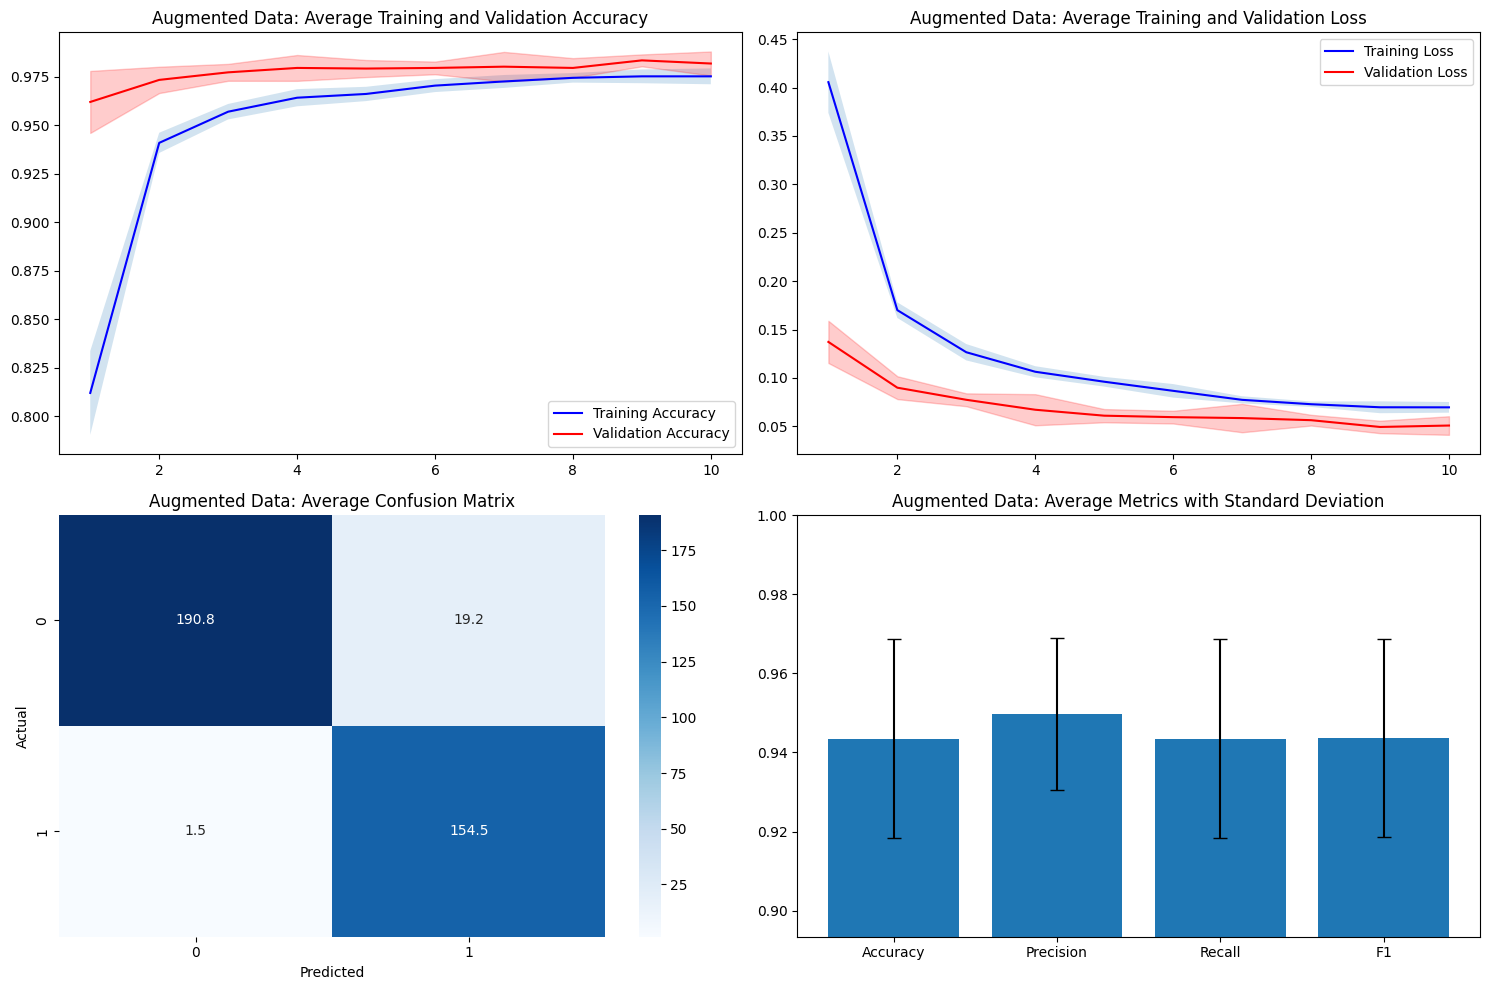


Average Metrics (± standard deviation):
Accuracy: 0.9434 ± 0.0251
Precision: 0.9497 ± 0.0193
Recall: 0.9434 ± 0.0251
F1: 0.9437 ± 0.0250

Average Confusion Matrix:
[[190.8  19.2]
 [  1.5 154.5]]


In [4]:

# Run the analysis
results_augmented = analyze_trials(all_trials_augmented, "Augmented Data: ")

# Print summary statistics
print("\nAverage Metrics (± standard deviation):")
for metric in ['accuracy', 'precision', 'recall', 'f1']:
   print(f"{metric.capitalize()}: {results_augmented['metrics'][metric]:.4f} ± {results_augmented['metrics_std'][metric+'_std']:.4f}")

print("\nAverage Confusion Matrix:")
print(results_augmented['avg_conf_matrix'])

# Real

### Store data

In [5]:
# Store each trial's results in a list
all_trials_real = []

# First trial
trial1 = {
    'history': {
        'accuracy': [0.40471240878105164, 0.42411643266677856, 0.4615384638309479, 0.4643104672431946, 
                     0.4989604949951172, 0.47955647110939026, 0.5162855386734009, 0.5135135054588318, 
                     0.5467775464057922, 0.5890505909919739],
        'loss': [1.0805083513259888, 0.9955511689186096, 0.9491023421287537, 0.9125964045524597,
                 0.8694409132003784, 0.8866177201271057, 0.816774845123291, 0.8268188834190369,
                 0.7647461295127869, 0.726777970790863],
        'val_accuracy': [0.3538961112499237, 0.3863636255264282, 0.4025973975658417, 0.41233766078948975,
                        0.4350649416446686, 0.44805195927619934, 0.4642857015132904, 0.4740259647369385,
                        0.4935064911842346, 0.5032467246055603],
        'val_loss': [1.0840063095092773, 1.0421169996261597, 1.0027271509170532, 0.964472770690918,
                    0.9281882047653198, 0.892790675163269, 0.8594282865524292, 0.826225996017456,
                    0.7943926453590393, 0.7651143670082092]
    },
    'confusion_matrix': np.array([[185, 25],
                                [113, 43]]),
    'accuracy': 0.6229508196721312,
    'precision': 0.6257272850828085,
    'recall': 0.6229508196721312,
    'f1': 0.5815453908425381
}
all_trials_real.append(trial1)

trial2 = {
   'history': {
       'accuracy': [0.5779625773429871, 0.6160776019096375, 0.6479556560516357, 0.6576576828956604,
                    0.664587676525116, 0.7234927415847778, 0.7241857051849365, 0.7519057393074036,
                    0.7567567825317383, 0.7789327502250671],
       'loss': [0.7376173734664917, 0.6925292611122131, 0.6488099694252014, 0.6199623942375183,
                0.6146677136421204, 0.5397204160690308, 0.5400473475456238, 0.5114200711250305,
                0.4941197633743286, 0.46925681829452515],
       'val_accuracy': [0.7662337422370911, 0.8116883039474487, 0.8376623392105103, 0.8474025726318359,
                       0.8603895902633667, 0.8961039185523987, 0.9123376607894897, 0.9123376607894897,
                       0.9253246784210205, 0.9285714030265808],
       'val_loss': [0.5233333110809326, 0.48962700366973877, 0.46260595321655273, 0.4377075433731079,
                   0.4155395030975342, 0.3962040841579437, 0.37783724069595337, 0.3607215881347656,
                   0.34493833780288696, 0.3303116261959076]
   },
   'confusion_matrix': np.array([[2, 208],
                               [14, 142]]),
   'accuracy': 0.39344262295081966,
   'precision': 0.2446487119437939,
   'recall': 0.39344262295081966,
   'f1': 0.24938285904988106
}
all_trials_real.append(trial2)

trial3 = {
   'history': {
       'accuracy': [0.5779625773429871, 0.5945945978164673, 0.5876646041870117, 0.6285516023635864,
                    0.6590436697006226, 0.6458766460418701, 0.6652806401252747, 0.6735966801643372,
                    0.692307710647583, 0.7117117047309875],
       'loss': [0.833124041557312, 0.7777916193008423, 0.7686334252357483, 0.7071229815483093,
                0.6551742553710938, 0.6396809816360474, 0.6152280569076538, 0.6049143075942993,
                0.570250928401947, 0.5619523525238037],
       'val_accuracy': [0.5584415793418884, 0.5746753215789795, 0.5909090638160706, 0.6038960814476013,
                       0.649350643157959, 0.7077922224998474, 0.7305194735527039, 0.7564935088157654,
                       0.7727272510528564, 0.8051947951316833],
       'val_loss': [0.7371213436126709, 0.6888319849967957, 0.6468686461448669, 0.611225962638855,
                   0.5799307227134705, 0.550144612789154, 0.5239607095718384, 0.49967390298843384,
                   0.477632999420166, 0.45637646317481995]
   },
   'confusion_matrix': np.array([[108, 102],
                               [50, 106]]),
   'accuracy': 0.5846994535519126,
   'precision': 0.6094106661133015,
   'recall': 0.5846994535519126,
   'f1': 0.5850218918643723
}
all_trials_real.append(trial3)

trial4 = {
   'history': {
       'accuracy': [0.6243936419487, 0.6431046724319458, 0.6632016897201538, 0.6756756901741028,
                    0.6930006742477417, 0.7158697247505188, 0.712404727935791, 0.7297297120094299,
                    0.7428967356681824, 0.7595287561416626],
       'loss': [0.7257043123245239, 0.708298921585083, 0.6473460793495178, 0.6481238007545471,
                0.630122184753418, 0.5835461020469666, 0.5792741775512695, 0.564812421798706,
                0.5274100303649902, 0.504821240901947],
       'val_accuracy': [0.5584415793418884, 0.5909090638160706, 0.6103895902633667, 0.6590909361839294,
                       0.6753246784210205, 0.6915584206581116, 0.7142857313156128, 0.7435064911842346,
                       0.7694805264472961, 0.7792207598686218],
       'val_loss': [0.6967610120773315, 0.6624277830123901, 0.6324425935745239, 0.6030406951904297,
                   0.5762814879417419, 0.5525872707366943, 0.528835654258728, 0.5066115856170654,
                   0.4854849874973297, 0.46603527665138245]
   },
   'confusion_matrix': np.array([[0, 210],
                               [31, 125]]),
   'accuracy': 0.34153005464480873,
   'precision': 0.15904086126743333,
   'recall': 0.34153005464480873,
   'f1': 0.21702113451971553
}
all_trials_real.append(trial4)

trial5 = {
   'history': {
       'accuracy': [0.5869715809822083, 0.6133056282997131, 0.6299376487731934, 0.623007595539093,
                    0.6659736633300781, 0.6812196969985962, 0.6742897033691406, 0.7137907147407532,
                    0.7207207083702087, 0.7422037124633789],
       'loss': [0.7702459692955017, 0.7225278615951538, 0.6968449354171753, 0.6774327158927917,
                0.6399049162864685, 0.6004064083099365, 0.6085174083709717, 0.5706390142440796,
                0.544234037399292, 0.5193172097206116],
       'val_accuracy': [0.6655844449996948, 0.7240259647369385, 0.75, 0.7727272510528564,
                       0.7889610528945923, 0.8116883039474487, 0.8279221057891846, 0.8344155550003052,
                       0.8571428656578064, 0.8733766078948975],
       'val_loss': [0.6421045660972595, 0.6048409342765808, 0.5722161531448364, 0.5428364872932434,
                   0.5166941285133362, 0.49275392293930054, 0.47086137533187866, 0.4504075050354004,
                   0.43020495772361755, 0.4123302698135376]
   },
   'confusion_matrix': np.array([[38, 172],
                               [19, 137]]),
   'accuracy': 0.4781420765027322,
   'precision': 0.5714892036712823,
   'recall': 0.4781420765027322,
   'f1': 0.4144750315410866
}
all_trials_real.append(trial5)

trial6 = {
   'history': {
       'accuracy': [0.590436577796936, 0.6285516023635864, 0.652113676071167, 0.6784476637840271,
                    0.7040886878967285, 0.7227997183799744, 0.7380457520484924, 0.7338877320289612,
                    0.7685377597808838, 0.7740817666053772],
       'loss': [0.7749334573745728, 0.7192173004150391, 0.6776914596557617, 0.6308109760284424,
                0.6097382307052612, 0.5913950204849243, 0.5428459048271179, 0.5414924025535583,
                0.4893958270549774, 0.4914723038673401],
       'val_accuracy': [0.6655844449996948, 0.698051929473877, 0.7370129823684692, 0.7564935088157654,
                       0.7792207598686218, 0.7922077775001526, 0.8214285969734192, 0.8376623392105103,
                       0.8538960814476013, 0.8636363744735718],
       'val_loss': [0.5954223275184631, 0.5573161840438843, 0.527438223361969, 0.5018052458763123,
                   0.47882169485092163, 0.45748212933540344, 0.43755215406417847, 0.4191829264163971,
                   0.40230390429496765, 0.38520869612693787]
   },
   'confusion_matrix': np.array([[0, 210],
                               [25, 131]]),
   'accuracy': 0.35792349726775957,
   'precision': 0.16374212778231817,
   'recall': 0.35792349726775957,
   'f1': 0.22469241679585714
}
all_trials_real.append(trial6)

trial7 = {
   'history': {
       'accuracy': [0.5772695541381836, 0.5932086110115051, 0.6167706251144409, 0.6327096223831177,
                    0.6680526733398438, 0.6819126605987549, 0.6888427138328552, 0.7415107488632202,
                    0.7463617324829102, 0.7442827224731445],
       'loss': [0.8084966540336609, 0.7501038908958435, 0.7398313879966736, 0.7010632753372192,
                0.639981210231781, 0.6354178190231323, 0.5976709723472595, 0.5348383188247681,
                0.5335066318511963, 0.5260941386222839],
       'val_accuracy': [0.5422077775001526, 0.5454545617103577, 0.5941558480262756, 0.6331169009208679,
                       0.6590909361839294, 0.6818181872367859, 0.698051929473877, 0.7110389471054077,
                       0.7240259647369385, 0.7629870176315308],
       'val_loss': [0.8164513111114502, 0.7516912221908569, 0.6961656808853149, 0.6500579714775085,
                   0.6126155853271484, 0.5780748128890991, 0.5501710176467896, 0.5234531760215759,
                   0.5003138184547424, 0.4766170084476471]
   },
   'confusion_matrix': np.array([[0, 210],
                               [18, 138]]),
   'accuracy': 0.3770491803278688,
   'precision': 0.16902204635387225,
   'recall': 0.3770491803278688,
   'f1': 0.23341139734582358
}
all_trials_real.append(trial7)

trial8 = {
   'history': {
       'accuracy': [0.6819126605987549, 0.7054747343063354, 0.744975745677948, 0.7345807552337646,
                    0.7664587497711182, 0.7886347770690918, 0.7810117602348328, 0.7941787838935852,
                    0.8059598207473755, 0.8142758011817932],
       'loss': [0.626736581325531, 0.5907291173934937, 0.548121452331543, 0.5351887345314026,
                0.5007596015930176, 0.4700087010860443, 0.4716023802757263, 0.45733746886253357,
                0.4267444908618927, 0.4119473397731781],
       'val_accuracy': [0.701298713684082, 0.7272727489471436, 0.75, 0.7889610528945923,
                       0.8214285969734192, 0.8376623392105103, 0.8571428656578064, 0.8603895902633667,
                       0.8701298832893372, 0.8896104097366333],
       'val_loss': [0.5712113976478577, 0.5340218544006348, 0.5034130215644836, 0.47566357254981995,
                   0.4510359466075897, 0.43063127994537354, 0.41082578897476196, 0.39220818877220154,
                   0.3752823770046234, 0.35993292927742004]
   },
   'confusion_matrix': np.array([[24, 186],
                               [15, 141]]),
   'accuracy': 0.45081967213114754,
   'precision': 0.5368765690618601,
   'recall': 0.45081967213114754,
   'f1': 0.35946085533458544
}
all_trials_real.append(trial8)

trial9 = {
   'history': {
       'accuracy': [0.3416493535041809, 0.3645183742046356, 0.3790713846683502, 0.39570340514183044,
                    0.4137214124202728, 0.43035343289375305, 0.45945945382118225, 0.48856547474861145,
                    0.4809424877166748, 0.5453915596008301],
       'loss': [1.4198577404022217, 1.2625983953475952, 1.2181483507156372, 1.112224817276001,
                1.048998236656189, 0.9906948804855347, 0.9589954614639282, 0.8823357224464417,
                0.8889588117599487, 0.8225053548812866],
       'val_accuracy': [0.38311687111854553, 0.399350643157959, 0.399350643157959, 0.40584415197372437,
                       0.41558441519737244, 0.4577922224998474, 0.47727271914482117, 0.5064935088157654,
                       0.5389610528945923, 0.5714285969734192],
       'val_loss': [1.2183982133865356, 1.1220712661743164, 1.0372200012207031, 0.9672935605049133,
                   0.9057565927505493, 0.8514494299888611, 0.8039161562919617, 0.7624038457870483,
                   0.7242459654808044, 0.6901595592498779]
   },
   'confusion_matrix': np.array([[203, 7],
                               [67, 89]]),
   'accuracy': 0.7978142076502732,
   'precision': 0.8265406800242866,
   'recall': 0.7978142076502732,
   'f1': 0.7863810824876399
}
all_trials_real.append(trial9)

trial10 = {
   'history': {
       'accuracy': [0.5751906037330627, 0.6139985918998718, 0.6271656155586243, 0.6548856496810913,
                    0.6514206528663635, 0.6680526733398438, 0.6978517174720764, 0.7075536847114563,
                    0.7234927415847778, 0.7345807552337646],
       'loss': [0.7580558657646179, 0.6899312138557434, 0.6903408765792847, 0.6363676190376282,
                0.6483235359191895, 0.6195205450057983, 0.5986815094947815, 0.5656336545944214,
                0.5463459491729736, 0.5197211503982544],
       'val_accuracy': [0.6103895902633667, 0.6428571343421936, 0.6655844449996948, 0.7077922224998474,
                       0.7305194735527039, 0.7564935088157654, 0.7889610528945923, 0.8214285969734192,
                       0.8441558480262756, 0.8668830990791321],
       'val_loss': [0.6502077579498291, 0.6150299906730652, 0.5834064483642578, 0.5553507208824158,
                   0.529334306716919, 0.5023455023765564, 0.4789240062236786, 0.45711418986320496,
                   0.436365008354187, 0.4178270101547241]
   },
   'confusion_matrix': np.array([[167, 43],
                               [22, 134]]),
   'accuracy': 0.8224043715846995,
   'precision': 0.8296646187727044,
   'recall': 0.8224043715846995,
   'f1': 0.8233306645731149
}
all_trials_real.append(trial10)

### Analyze

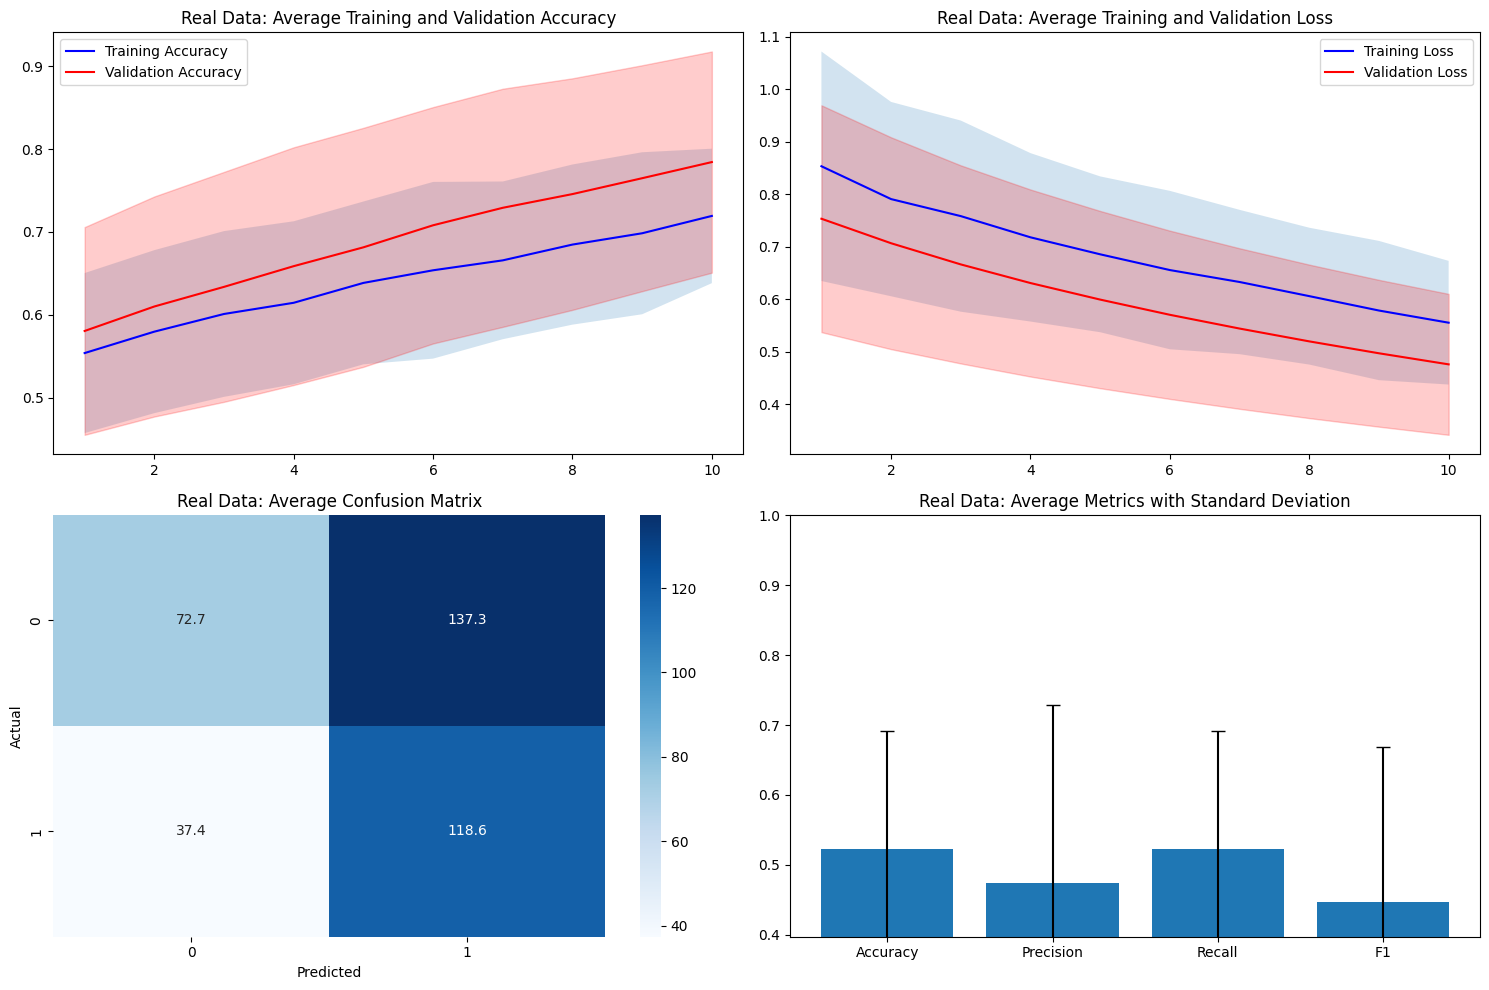


Average Metrics (± standard deviation):
Accuracy: 0.5227 ± 0.1687
Precision: 0.4736 ± 0.2543
Recall: 0.5227 ± 0.1687
F1: 0.4475 ± 0.2213

Average Confusion Matrix:
[[ 72.7 137.3]
 [ 37.4 118.6]]


In [6]:

# Run the analysis
results_real = analyze_trials(all_trials_real, "Real Data: ")

# Print summary statistics
print("\nAverage Metrics (± standard deviation):")
for metric in ['accuracy', 'precision', 'recall', 'f1']:
   print(f"{metric.capitalize()}: {results_real['metrics'][metric]:.4f} ± {results_real['metrics_std'][metric+'_std']:.4f}")

print("\nAverage Confusion Matrix:")
print(results_real['avg_conf_matrix'])

# Synthetic

### Store Data

In [ ]:
all_trials_synthetic = []

trial1 = {
   'history': {
       'accuracy': [0.8263266682624817, 0.931082010269165, 0.9427980780601501, 0.9448655843734741, 0.9538249373435974, 0.9676085710525513, 0.9634734392166138, 0.9724327921867371, 0.9758787155151367, 0.9689869284629822],
       'loss': [0.38936442136764526, 0.18688131868839264, 0.15221332013607025, 0.14602051675319672, 0.11575281620025635, 0.09879693388938904, 0.09312042593955994, 0.0835481658577919, 0.07876861095428467, 0.08049517124891281],
       'val_accuracy': [0.9473684430122375, 0.9889196753501892, 0.9916897416114807, 0.9778393507003784, 0.9972299337387085, 0.9972299337387085, 0.9972299337387085, 1.0, 0.9944598078727722, 0.9972299337387085],
       'val_loss': [0.14352194964885712, 0.06808006018400192, 0.06069142743945122, 0.0900866836309433, 0.04202020913362503, 0.0419626459479332, 0.029510127380490303, 0.024516895413398743, 0.026647379621863365, 0.021364951506257057]
   },
   'confusion_matrix': np.array([[210, 0], [1, 155]]),
   'accuracy': 0.9972677595628415,
   'precision': 0.9972807085696527,
   'recall': 0.9972677595628415,
   'f1': 0.9972666118344652
}

all_trials_synthetic.append(trial1)

trial2 = {
   'history': {
       'accuracy': [0.8290833830833435, 0.9421088695526123, 0.945554792881012, 0.9517574310302734, 0.9614059329032898, 0.9600275754928589, 0.9662302136421204, 0.9682977199554443, 0.9669193625450134, 0.9751895070075989],
       'loss': [0.37990641593933105, 0.15725499391555786, 0.13793373107910156, 0.12304827570915222, 0.10076441615819931, 0.09993834793567657, 0.09106269478797913, 0.08909492194652557, 0.09079505503177643, 0.080217644572258],
       'val_accuracy': [0.9861496090888977, 0.9806094169616699, 0.9944598078727722, 0.9944598078727722, 0.9944598078727722, 0.9944598078727722, 0.9972299337387085, 1.0, 0.9972299337387085, 0.9972299337387085],
       'val_loss': [0.12329583615064621, 0.0948275551199913, 0.05521434545516968, 0.05120496824383736, 0.044312745332717896, 0.039160288870334625, 0.026529191061854362, 0.022756343707442284, 0.021318770945072174, 0.022013671696186066]
   },
   'confusion_matrix': np.array([[210, 0], [1, 155]]),
   'accuracy': 0.9972677595628415,
   'precision': 0.9972807085696527,
   'recall': 0.9972677595628415,
   'f1': 0.9972666118344652
}

all_trials_synthetic.append(trial2)

trial3 = {
   'history': {
       'accuracy': [0.792556881904602, 0.9269469380378723, 0.946243941783905, 0.9538249373435974, 0.958649218082428, 0.9655410051345825, 0.9676085710525513, 0.9669193625450134, 0.9689869284629822, 0.9682977199554443],
       'loss': [0.42989054322242737, 0.18074065446853638, 0.14623551070690155, 0.1185624971985817, 0.11240068078041077, 0.0978078618645668, 0.09015381336212158, 0.090628981590271, 0.09230825304985046, 0.08197402954101562],
       'val_accuracy': [0.9722991585731506, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9972299337387085, 1.0, 1.0, 0.9972299337387085],
       'val_loss': [0.13667535781860352, 0.06363014876842499, 0.044890839606523514, 0.040851619094610214, 0.041419871151447296, 0.03350990265607834, 0.035247523337602615, 0.02569841966032982, 0.0205370020121336, 0.03157800808548927]
   },
   'confusion_matrix': np.array([[210, 0], [1, 155]]),
   'accuracy': 0.9972677595628415,
   'precision': 0.9972807085696527,
   'recall': 0.9972677595628415,
   'f1': 0.9972666118344652
}

all_trials_synthetic.append(trial3)

trial4 = {
   'history': {
       'accuracy': [0.8015161752700806, 0.9345279335975647, 0.946243941783905, 0.9517574310302734, 0.9620950818061829, 0.9655410051345825, 0.9655410051345825, 0.9648517966270447, 0.9669193625450134, 0.9703652858734131],
       'loss': [0.41021132469177246, 0.17542468011379242, 0.14684449136257172, 0.11987297236919403, 0.10526793450117111, 0.09886918216943741, 0.10295084118843079, 0.09175470471382141, 0.10635720193386078, 0.07680556923151016],
       'val_accuracy': [0.9612188339233398, 0.9833794832229614, 0.9944598078727722, 0.9944598078727722, 0.9916897416114807, 0.9972299337387085, 1.0, 0.9972299337387085, 0.9972299337387085, 0.9944598078727722],
       'val_loss': [0.15568211674690247, 0.0892716646194458, 0.05648544430732727, 0.0440039187669754, 0.042625490576028824, 0.026513144373893738, 0.02435859851539135, 0.024764975532889366, 0.024949831888079643, 0.023579459637403488]
   },
   'confusion_matrix': np.array([[210, 0], [1, 155]]),
   'accuracy': 0.9972677595628415,
   'precision': 0.9972807085696527,
   'recall': 0.9972677595628415,
   'f1': 0.9972666118344652
}

all_trials_synthetic.append(trial4)

trial5 = {
   'history': {
       'accuracy': [0.7711922526359558, 0.9276360869407654, 0.9517574310302734, 0.946243941783905, 0.9572708606719971, 0.9627842903137207, 0.9703652858734131, 0.9682977199554443, 0.9648517966270447, 0.9676085710525513],
       'loss': [0.46377459168434143, 0.19091688096523285, 0.14482827484607697, 0.13163824379444122, 0.11801591515541077, 0.10907378047704697, 0.08801855891942978, 0.0907067358493805, 0.0920976996421814, 0.08743176609277725],
       'val_accuracy': [0.9639889001846313, 0.9916897416114807, 0.9944598078727722, 0.9916897416114807, 0.9889196753501892, 0.9944598078727722, 1.0, 1.0, 1.0, 0.9972299337387085],
       'val_loss': [0.1575680822134018, 0.06955619901418686, 0.047838881611824036, 0.05212385579943657, 0.05800113081932068, 0.04084855690598488, 0.03192566707730293, 0.027019793167710304, 0.02076309733092785, 0.032486457377672195]
   },
   'confusion_matrix': np.array([[209, 1], [1, 155]]),
   'accuracy': 0.994535519125683,
   'precision': 0.994535519125683,
   'recall': 0.994535519125683,
   'f1': 0.994535519125683
}

all_trials_synthetic.append(trial5)

trial6 = {
   'history': {
       'accuracy': [0.8380427360534668, 0.9352170825004578, 0.9552032947540283, 0.9572708606719971, 0.9620950818061829, 0.9600275754928589, 0.9655410051345825, 0.9627842903137207, 0.9662302136421204, 0.9751895070075989],
       'loss': [0.38045254349708557, 0.16885557770729065, 0.12564200162887573, 0.12097535282373428, 0.10241968184709549, 0.10453806817531586, 0.09669412672519684, 0.09263452142477036, 0.08601444959640503, 0.06717647612094879],
       'val_accuracy': [0.950138509273529, 0.9944598078727722, 0.9916897416114807, 0.9972299337387085, 0.9972299337387085, 0.9972299337387085, 0.9972299337387085, 0.9972299337387085, 0.9972299337387085, 0.9972299337387085],
       'val_loss': [0.1490660309791565, 0.06786476075649261, 0.05773544684052467, 0.0403999388217926, 0.03260748088359833, 0.02882196381688118, 0.0249150563031435, 0.023934558033943176, 0.02664278820157051, 0.02258940599858761]
   },
   'confusion_matrix': np.array([[209, 1], [2, 154]]),
   'accuracy': 0.9918032786885246,
   'precision': 0.9918115493444879,
   'recall': 0.9918032786885246,
   'f1': 0.9917998355033955
}

all_trials_synthetic.append(trial6)

trial7 = {
   'history': {
       'accuracy': [0.7973811030387878, 0.9365954399108887, 0.946243941783905, 0.958649218082428, 0.9531357884407043, 0.9600275754928589, 0.9614059329032898, 0.9689869284629822, 0.9689869284629822, 0.9696760773658752],
       'loss': [0.42012760043144226, 0.17497913539409637, 0.1487802118062973, 0.11809418350458145, 0.10810192674398422, 0.10121998190879822, 0.09610879421234131, 0.08817904442548752, 0.08836612850427628, 0.08103566616773605],
       'val_accuracy': [0.9695290923118591, 0.9778393507003784, 0.9944598078727722, 0.9944598078727722, 0.9944598078727722, 0.9944598078727722, 0.9944598078727722, 0.9944598078727722, 0.9944598078727722, 0.9916897416114807],
       'val_loss': [0.1291435807943344, 0.09439020603895187, 0.05862710624933243, 0.04913049936294556, 0.05061910301446915, 0.04650542512536049, 0.034501463174819946, 0.031328096985816956, 0.0322285033762455, 0.032485030591487885]
   },
   'confusion_matrix': np.array([[209, 1], [2, 154]]),
   'accuracy': 0.9918032786885246,
   'precision': 0.9918115493444879,
   'recall': 0.9918032786885246,
   'f1': 0.9917998355033955
}

all_trials_synthetic.append(trial7)

trial8 = {
   'history': {
       'accuracy': [0.7525843977928162, 0.9317712187767029, 0.946243941783905, 0.9476223587989807, 0.9558925032615662, 0.9669193625450134, 0.9676085710525513, 0.9696760773658752, 0.9648517966270447, 0.9800137877464294],
       'loss': [0.5134353637695312, 0.1915401816368103, 0.14777660369873047, 0.1334405392408371, 0.116180419921875, 0.09058000147342682, 0.09592720121145248, 0.09108279645442963, 0.08399908244609833, 0.07249534130096436],
       'val_accuracy': [0.930747926235199, 0.9889196753501892, 0.9944598078727722, 0.9972299337387085, 0.9972299337387085, 0.9944598078727722, 0.9972299337387085, 0.9972299337387085, 1.0, 1.0],
       'val_loss': [0.17411072552204132, 0.09675365686416626, 0.06388379633426666, 0.04563554748892784, 0.036017123609781265, 0.0456717275083065, 0.028426051139831543, 0.036043670028448105, 0.027474790811538696, 0.023372460156679153]
   },
   'confusion_matrix': np.array([[210, 0], [1, 155]]),
   'accuracy': 0.9972677595628415,
   'precision': 0.9972807085696527,
   'recall': 0.9972677595628415,
   'f1': 0.9972666118344652
}

all_trials_synthetic.append(trial8)

trial9 = {
   'history': {
       'accuracy': [0.7960027456283569, 0.9228118658065796, 0.9510682225227356, 0.9572708606719971, 0.9641626477241516, 0.9689869284629822, 0.9641626477241516, 0.9634734392166138, 0.9703652858734131, 0.9710544347763062],
       'loss': [0.4163500666618347, 0.1995263397693634, 0.13636329770088196, 0.13037775456905365, 0.10784056037664413, 0.09271705895662308, 0.09987243264913559, 0.0894642025232315, 0.08852152526378632, 0.0856291875243187],
       'val_accuracy': [0.9667590260505676, 0.9944598078727722, 0.9916897416114807, 0.9972299337387085, 0.9944598078727722, 0.9972299337387085, 0.9944598078727722, 0.9944598078727722, 0.9944598078727722, 0.9944598078727722],
       'val_loss': [0.1413695067167282, 0.07556970417499542, 0.07822473347187042, 0.03603404387831688, 0.03653781861066818, 0.029467960819602013, 0.029449494555592537, 0.031045086681842804, 0.022097866982221603, 0.027693482115864754]
   },
   'confusion_matrix': np.array([[210, 0], [1, 155]]),
   'accuracy': 0.9972677595628415,
   'precision': 0.9972807085696527,
   'recall': 0.9972677595628415,
   'f1': 0.9972666118344652
}

all_trials_synthetic.append(trial9)

trial10 = {
   'history': {
       'accuracy': [0.7829083204269409, 0.9331495761871338, 0.9483115077018738, 0.9517574310302734, 0.9600275754928589, 0.9627842903137207, 0.9655410051345825, 0.973811149597168],
       'loss': [0.42809054255485535, 0.17568784952163696, 0.14535315334796906, 0.12752458453178406, 0.1092212125658989, 0.10442674905061722, 0.09657120704650879, 0.08571465313434601],
       'val_accuracy': [0.9445983171463013, 0.9833794832229614, 0.9916897416114807, 0.9916897416114807, 0.9972299337387085, 0.9916897416114807, 0.9944598078727722, 0.9944598078727722],
       'val_loss': [0.15427690744400024, 0.08852311968803406, 0.056444134563207626, 0.05423421785235405, 0.03093033656477928, 0.04775765910744667, 0.037414226680994034, 0.03835625573992729]
   },
   'confusion_matrix': np.array([[209, 1], [1, 155]]),
   'accuracy': 0.994535519125683,
   'precision': 0.994535519125683,
   'recall': 0.994535519125683,
   'f1': 0.994535519125683
}

all_trials_synthetic.append(trial10)

### Analyze

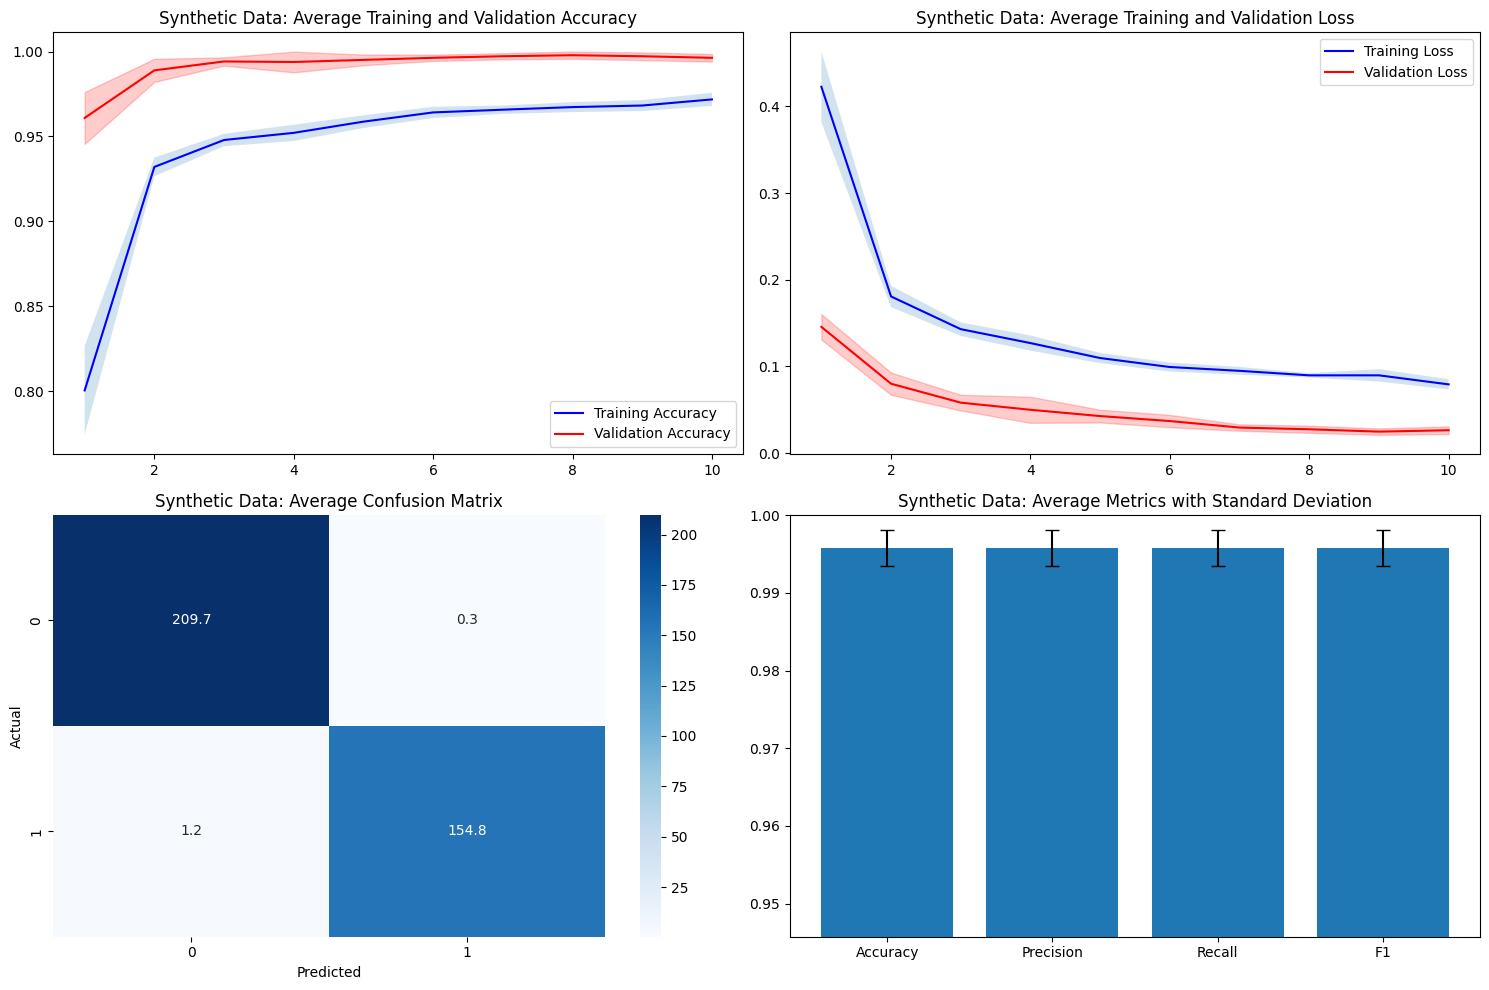


Average Metrics (± standard deviation):
Accuracy: 0.9957 ± 0.0023
Precision: 0.9958 ± 0.0023
Recall: 0.9957 ± 0.0023
F1: 0.9957 ± 0.0023

Average Confusion Matrix:
[[209.66666667   0.33333333]
 [  1.22222222 154.77777778]]


In [23]:

# Run the analysis
results_synthetic = analyze_trials(all_trials_synthetic, "Synthetic Data: ")

# Print summary statistics
print("\nAverage Metrics (± standard deviation):")
for metric in ['accuracy', 'precision', 'recall', 'f1']:
   print(f"{metric.capitalize()}: {results_synthetic['metrics'][metric]:.4f} ± {results_synthetic['metrics_std'][metric+'_std']:.4f}")

print("\nAverage Confusion Matrix:")
print(results_synthetic['avg_conf_matrix'])